In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def featureInfo(data):
    """
    Function untuk mengetahui informasi dari feature
    """
    row = []

    for i in data.columns:
        row.append([i, 
                     data[i].dtype, 
                     data[i].isna().sum(), 
                     data[i].isna().sum()/len(data)*100, 
                     data[i].count(),
                     data[i].nunique(), 
                     data[i].unique()[0:4]])
    
    kolom = ["feature", "data_type", "null_sum", "null_persen", "count","count_unique", "sample"]
    tabel = pd.DataFrame(data=row, columns=kolom)
    print("Banyak data duplikat:", data.duplicated().sum())
    return tabel

# Application Train

In [6]:
application_train = pd.read_csv("application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
atr = featureInfo(application_train)
print("Jumlah null_persen diatas 5%:", atr[atr["null_persen"]>5]["feature"].count())
atr

Banyak data duplikat: 0
Jumlah null_persen diatas 5%: 57


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_CURR,int64,0,0.000000,307511,307511,"[100002, 100003, 100004, 100006]"
1,TARGET,int64,0,0.000000,307511,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000000,307511,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000000,307511,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000000,307511,2,"[N, Y]"
...,...,...,...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.501631,265992,9,"[0.0, nan, 1.0, 3.0]"
118,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.501631,265992,9,"[0.0, nan, 1.0, 3.0]"
119,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.501631,265992,24,"[0.0, nan, 1.0, 2.0]"
120,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.501631,265992,11,"[0.0, nan, 1.0, 2.0]"


# Installment Payments

In [8]:
installments_payments = pd.read_csv("installments_payments.csv")

In [11]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [13]:
ip = featureInfo(installments_payments)
ip

Banyak data duplikat: 0


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_PREV,int64,0,0.000000,13605401,997752,"[1054186, 1330831, 2085231, 2452527]"
1,SK_ID_CURR,int64,0,0.000000,13605401,339587,"[161674, 151639, 193053, 199697]"
2,NUM_INSTALMENT_VERSION,float64,0,0.000000,13605401,65,"[1.0, 0.0, 2.0, 4.0]"
3,NUM_INSTALMENT_NUMBER,int64,0,0.000000,13605401,277,"[6, 34, 1, 3]"
4,DAYS_INSTALMENT,float64,0,0.000000,13605401,2922,"[-1180.0, -2156.0, -63.0, -2418.0]"
5,DAYS_ENTRY_PAYMENT,float64,2905,0.021352,13602496,3039,"[-1187.0, -2156.0, -63.0, -2426.0]"
6,AMT_INSTALMENT,float64,0,0.000000,13605401,902539,"[6948.36, 1716.525, 25425.0, 24350.13]"
7,AMT_PAYMENT,float64,2905,0.021352,13602496,944235,"[6948.36, 1716.525, 25425.0, 24350.13]"


# Installment Payment Target

**Inner join karena sisa id yang tidak ada adalah data dari application test**

In [9]:
ip_target = installments_payments.merge(application_train[["SK_ID_CURR", "TARGET"]],
                                       on="SK_ID_CURR"
                                  )

In [27]:
ip_target.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0


In [15]:
featureInfo(ip_target)

Banyak data duplikat: 0


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_PREV,int64,0,0.000000,11591592,853344,"[1054186, 1330831, 2085231, 2452527]"
1,SK_ID_CURR,int64,0,0.000000,11591592,291643,"[161674, 151639, 193053, 199697]"
2,NUM_INSTALMENT_VERSION,float64,0,0.000000,11591592,55,"[1.0, 0.0, 2.0, 4.0]"
3,NUM_INSTALMENT_NUMBER,int64,0,0.000000,11591592,277,"[6, 34, 1, 3]"
4,DAYS_INSTALMENT,float64,0,0.000000,11591592,2922,"[-1180.0, -2156.0, -63.0, -2418.0]"
5,DAYS_ENTRY_PAYMENT,float64,2583,0.022283,11589009,3039,"[-1187.0, -2156.0, -63.0, -2426.0]"
6,AMT_INSTALMENT,float64,0,0.000000,11591592,831108,"[6948.36, 1716.525, 25425.0, 24350.13]"
7,AMT_PAYMENT,float64,2583,0.022283,11589009,875297,"[6948.36, 1716.525, 25425.0, 24350.13]"
8,TARGET,int64,0,0.000000,11591592,2,"[0, 1]"


In [16]:
ip_target.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
count,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.158901e+07,1.159159e+07,1.158901e+07,1.159159e+07
mean,1.903552e+06,2.785345e+05,8.509618e-01,1.873027e+01,-1.041082e+03,-1.049898e+03,1.691790e+04,1.707693e+04,7.593892e-02
std,5.362314e+05,1.026410e+05,1.002910e+00,2.649067e+01,7.994779e+02,7.990790e+02,5.033127e+04,5.445628e+04,2.649004e-01
min,1.000001e+06,1.000020e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434524e+06,1.897190e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.663000e+03,4.203675e+03,3.378375e+03,0.000000e+00
50%,1.896635e+06,2.788280e+05,1.000000e+00,8.000000e+00,-8.200000e+02,-8.290000e+02,8.787645e+03,8.095410e+03,0.000000e+00
75%,2.369256e+06,3.675090e+05,1.000000e+00,1.900000e+01,-3.590000e+02,-3.680000e+02,1.655559e+04,1.593193e+04,0.000000e+00
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06,1.000000e+00


In [170]:
ip_target["TARGET"].value_counts(normalize=True)

TARGET
0    0.924061
1    0.075939
Name: proportion, dtype: float64

## No. 1 Descriptive Statistics  
- Semua kolom mempunyai tipe data yang sudah sesuai
- Ada 2 kolom yang mempunyai nilai null, kolom `DAYS_ENTRY_PAYMENT` dan `AMT_PAYMENT` mempunyai 2905 nilai null atau sebesar 0.02%. Jika dilakukan left join dengan target, maka target mempunyai 2,013,809 nilai null atau sebesar 14.8%
- Hampir semua kolom mempunyai summary yang aneh:
    - Kolom `NUM_INSTALMENT_VERSION` dan `NUM_INSTALMENT_NUMBER` mempunyai nilai max yang sangat tinggi sehingga ada potensi outlier dan terlihat juga ada potensi skew yang terlihat dari perbedaan mean dengan median.
    - Kolom `DAYS_INSTALMENT` dan `DAYS_ENTRY_PAYMENT` mempunyai perbedaan nilai median dengan mean yang berarti berpotensi skew, dan kolom `DAYS_ENTRY_PAYMENT` mempunyai nilai min yang sangat tinggi sehingga ada potensi outlier.
    - Kolom `AMT_INSTALMENT` dan `AMT_PAYMENT` mempunyai nilai max yang sangat tinggi sehingga ada potensi outlier dan mempunyai perbedaan mean dengan median sehingga berpotensi skew.

In [17]:
ip_target_columns = []
for i in ip_target.columns:
    ip_target_columns.append(i)

# ip_target_columns

## Distribution

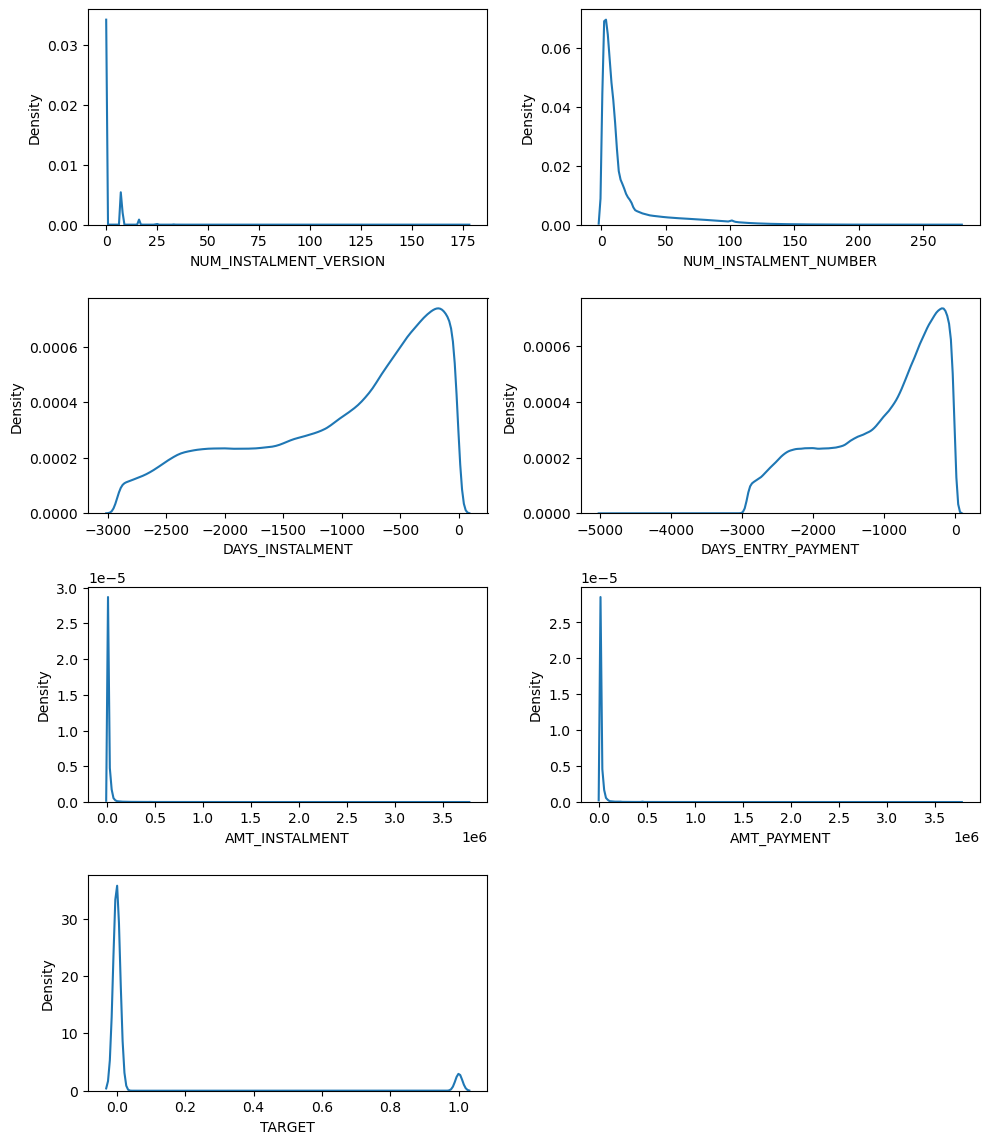

In [172]:
plt.figure(figsize=(10,14))
for i in range(len(ip_target_columns)-2):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=ip_target[ip_target_columns[i+2]])
    plt.tight_layout()

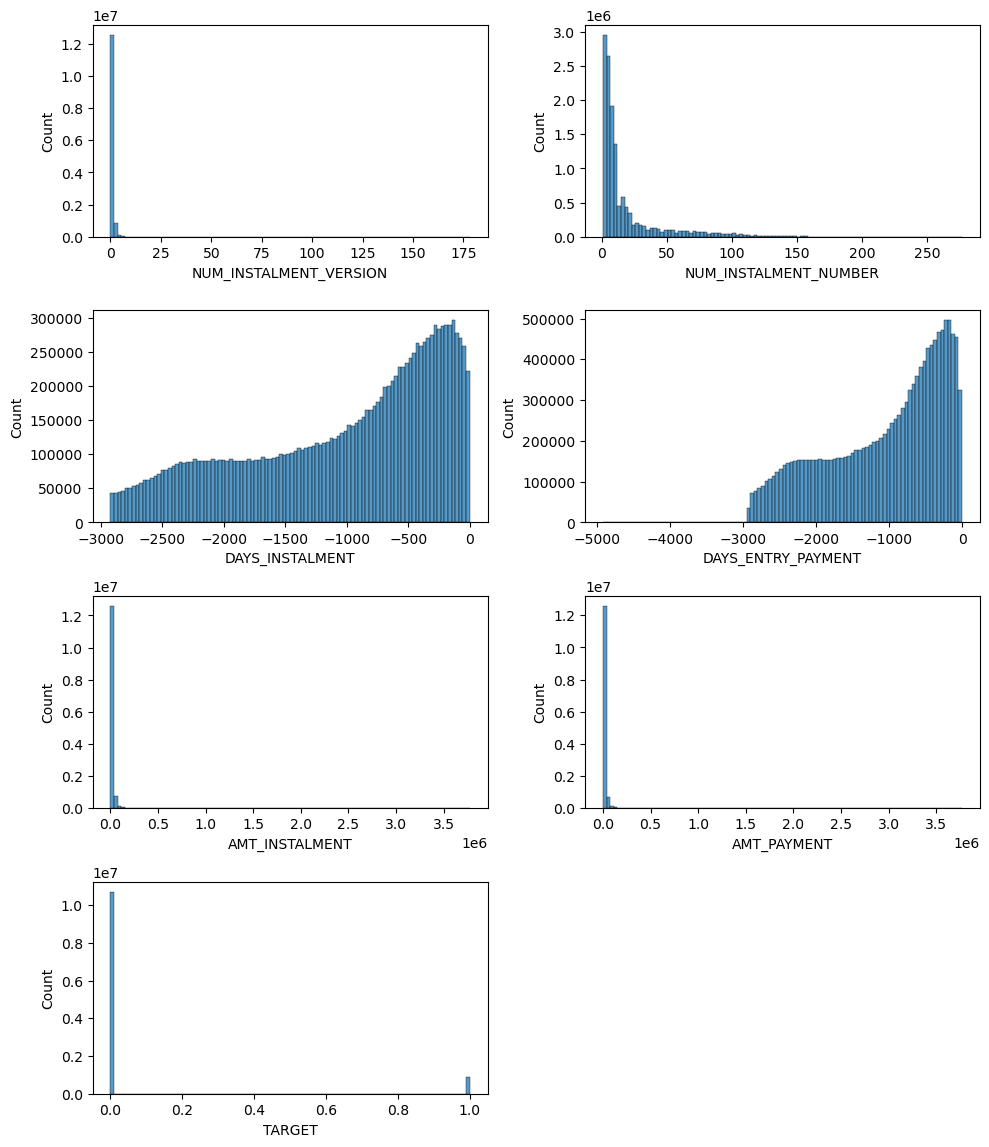

In [20]:
plt.figure(figsize=(10,14))
for i in range(len(ip_target_columns)-2):
    plt.subplot(5, 2, i+1)
    sns.histplot(x=ip_target[ip_target_columns[i+2]], bins=100)
    plt.tight_layout()

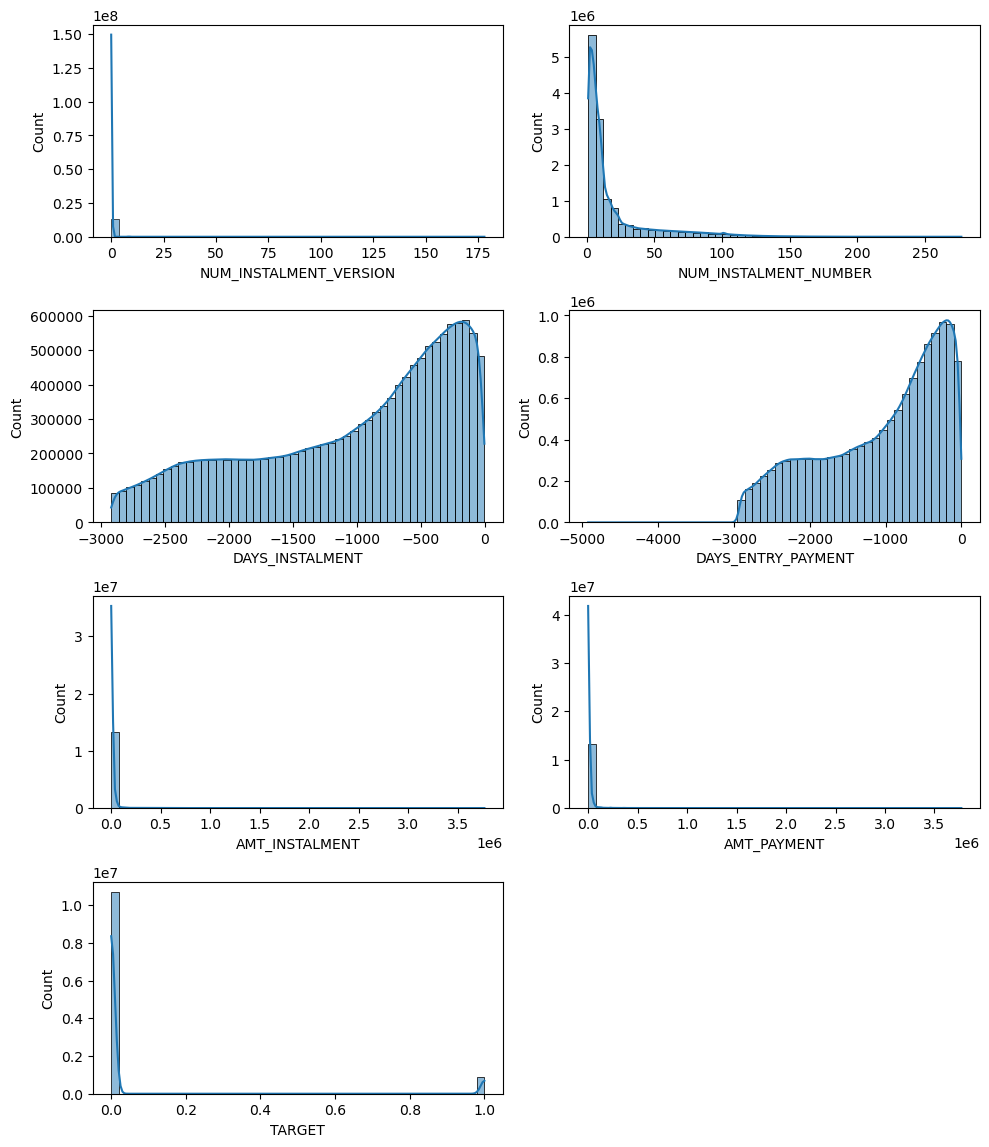

In [74]:
plt.figure(figsize=(10,14))
for i in range(len(ip_target_columns)-2):
    plt.subplot(5, 2, i+1)
    sns.histplot(x=ip_target[ip_target_columns[i+2]], kde=True, bins=50)
    plt.tight_layout()

In [21]:
print("Persentase jumlah data TARGET 1:", (ip_target[ip_target["TARGET"] == 1]["TARGET"]).count()/ip_target["TARGET"].count()*100, "%")

Persentase jumlah data TARGET 1: 7.5938921935830725 %


## Boxenplot

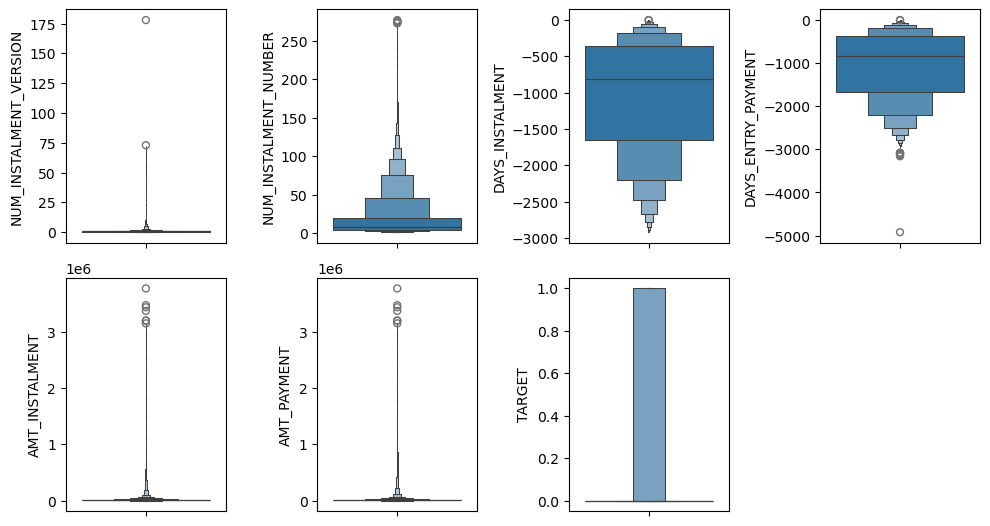

In [23]:
plt.figure(figsize=(10,8))
for i in range(len(ip_target_columns)-2):
    plt.subplot(3, 4, i+1)
    sns.boxenplot(y=ip_target[ip_target_columns[i+2]])
    plt.tight_layout()

## No.2 Univariate Analysis
   
   - Kolom `NUM_INSTALMENT_VERSION` menunjukkan adanya positive skew yang sangat tajam dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur.
   - Kolom `NUM_INSTALMENT_NUMBER` menunjukkan adanya positive skew dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur.
   - Kolom `DAYS_INSTALMENT` menunjukkan adanya negative skew dan tidak terlalu ada nilai min/max yang sangat timpang. Pada pre-processing harus dilakukan transformasi fitur.
   - Kolom `DAYS_ENTRY_PAYMENT` menunjukkan adanya negative skew juga tetapi pada kolom ini terlihat ada data dengan min yang sangat rendah sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan pengisian missing values, outlier handling dan transformasi fitur.
   - Kolom `AMT_INSTALMENT` dan `AMT_PAYMENT` menunjukkan adanya positive skew yang sangat tajam dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur dan untuk kolom `AMT_PAYMENT` dilakukan pengisian missing values.
   - Kolom `TARGET` yang merupakan label menunjukkan distribusi bimodal dan terlihat adanya class imbalance kategori sedang karena masih diantara 1%-20%. Pada pre-processing harus dilakukan class imbalance handling dan pengisian missing values.

## Heatmap

<Axes: >

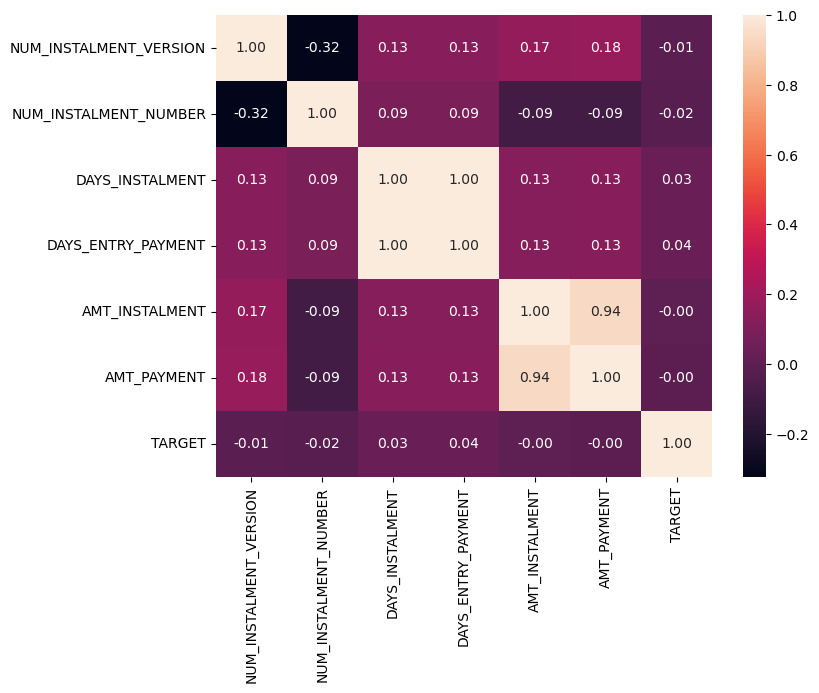

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(ip_target[ip_target_columns[2::]].corr(), color="Red", annot=True, fmt=".2f")

## No.3 Multivariate Analysis

- Tidak ada korelasi antara fitur dengan target, fitur yang dapat dipertahankan adalah:
    - `NUM_INSTALMENT_VERSION`
    - `NUM_INSTALMENT_NUMBER`
    - `DAYS_ENTRY_PAYMENT`
    - `AMT_PAYMENT`
    - `TARGET`
- Ada korelasi antar fitur yaitu `DAYS_INSTALMENT` dengan `DAYS_ENTRY_PAYMENT` dan `AMT_INSTALMENT` dengan `AMT_PAYMENT`. Karena ada fitur yang redundan, maka akan ada fitur yang tidak dipakai.

## Target VS Days and AMT

In [29]:
amount_persen = ip_target.groupby("TARGET").agg({"AMT_INSTALMENT":"median",
                                                 "AMT_PAYMENT":"median"
                                                }).reset_index()
amount_persen["AMT_PERCENTAGE"] = 100-(amount_persen["AMT_PAYMENT"]/amount_persen["AMT_INSTALMENT"]*100)
amount_persen

,TARGET,AMT_INSTALMENT,AMT_PAYMENT,AMT_PERCENTAGE
0,0.0,8839.845,8100.00,8.369434
1,1.0,8194.320,7278.12,11.180916


In [30]:
days_persen = ip_target.groupby("TARGET").agg({"DAYS_INSTALMENT": "median",
                                               "DAYS_ENTRY_PAYMENT":"median"
                                                }).reset_index()
days_persen["DAYS_PERCENTAGE"] = (days_persen["DAYS_ENTRY_PAYMENT"]-days_persen["DAYS_INSTALMENT"])/days_persen["DAYS_INSTALMENT"]*100
days_persen

,TARGET,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,DAYS_PERCENTAGE
0,0.0,-832.0,-840.0,0.961538
1,1.0,-694.0,-702.0,1.152738


In [31]:
amount_median = ip_target.groupby("TARGET").agg({"AMT_INSTALMENT":"median",
                                  "AMT_PAYMENT":"median",
                                "DAYS_INSTALMENT": "median",
                                "DAYS_ENTRY_PAYMENT":"median"}).reset_index()
amount_median

,TARGET,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,0.0,8839.845,8100.00,-832.0,-840.0
1,1.0,8194.320,7278.12,-694.0,-702.0


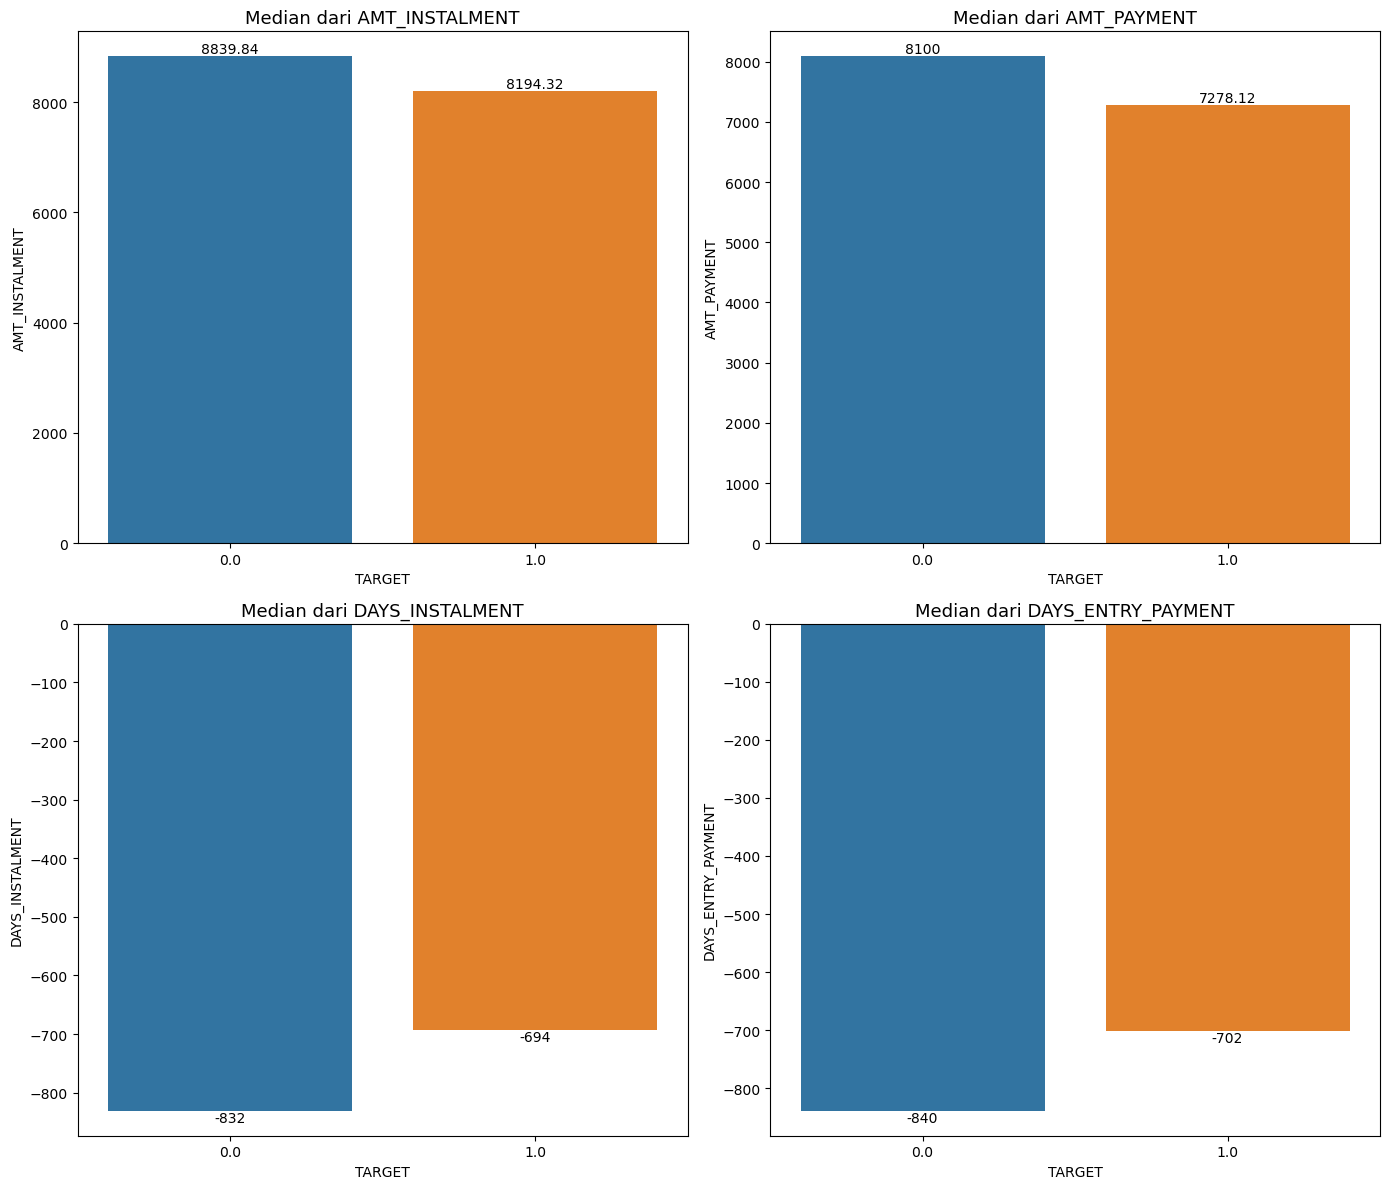

In [32]:
amt = amount_median.columns.tolist()[1::]
plt.figure(figsize=(14,12))
for i in range(len(amt)):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(x=amount_median["TARGET"], y=amount_median[amt[i]], hue=amount_median["TARGET"], legend=False)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f"Median dari {amt[i]}", fontsize=13)
    plt.tight_layout()

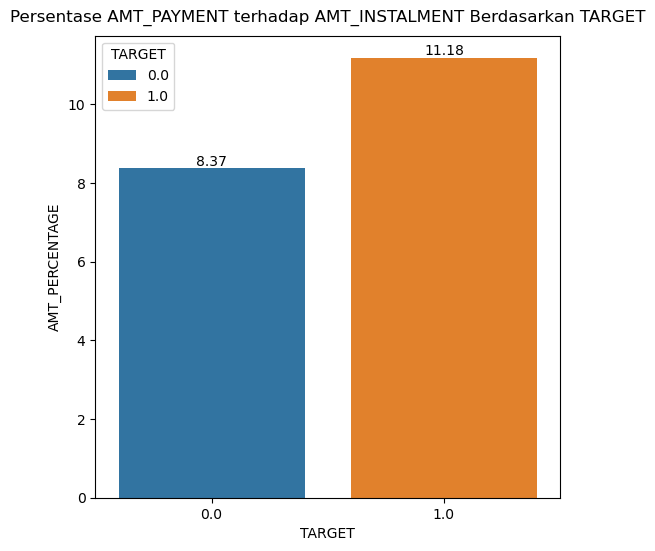

In [33]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=amount_persen["TARGET"], y=amount_persen["AMT_PERCENTAGE"], hue=amount_persen["TARGET"])
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.bar_label(ax.containers[1], fmt="%.2f")
plt.title("Persentase AMT_PAYMENT terhadap AMT_INSTALMENT Berdasarkan TARGET", pad=10)
plt.show()

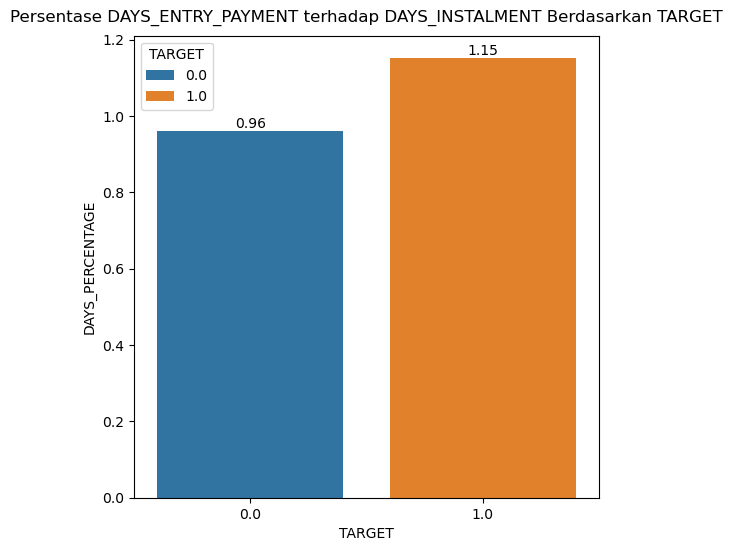

In [34]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=days_persen["TARGET"], y=days_persen["DAYS_PERCENTAGE"], hue=days_persen["TARGET"])
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.bar_label(ax.containers[1], fmt="%.2f")
plt.title("Persentase DAYS_ENTRY_PAYMENT terhadap DAYS_INSTALMENT Berdasarkan TARGET", pad=10)
plt.show()

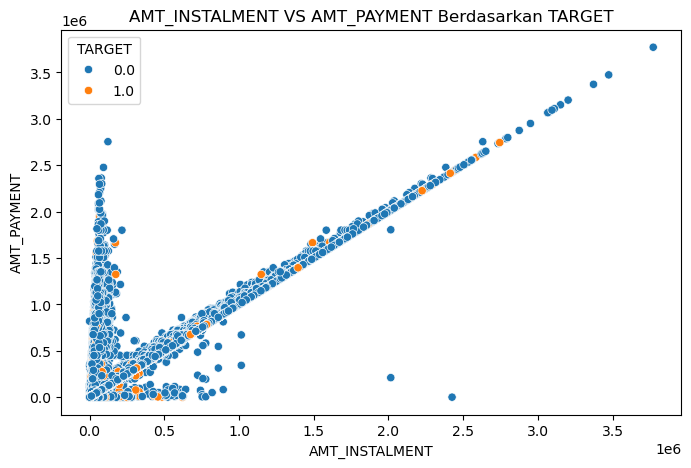

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", hue="TARGET", data=ip_target)
plt.title("AMT_INSTALMENT VS AMT_PAYMENT Berdasarkan TARGET")
plt.show()

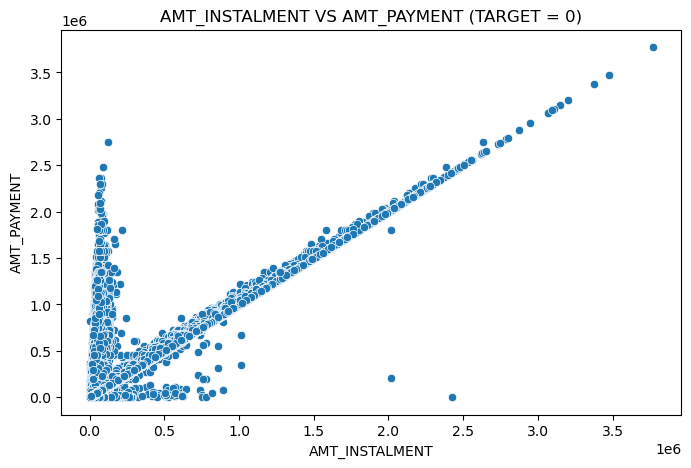

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", data=ip_target[ip_target["TARGET"]== 0])
plt.title("AMT_INSTALMENT VS AMT_PAYMENT (TARGET = 0)")
plt.show()

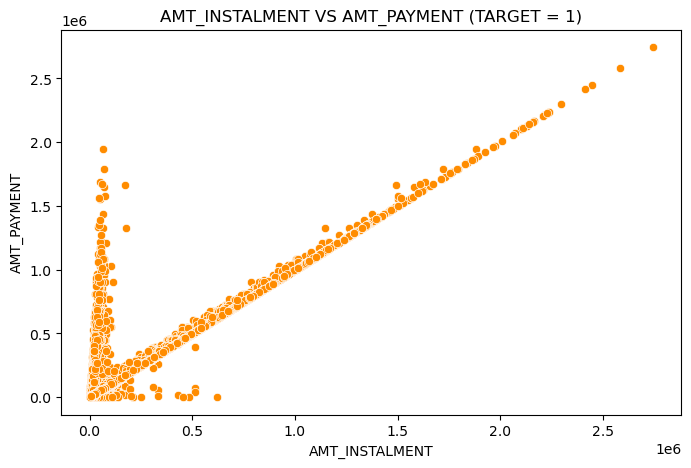

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", data=ip_target[ip_target["TARGET"]== 1], color="darkorange")
plt.title("AMT_INSTALMENT VS AMT_PAYMENT (TARGET = 1)")
plt.show()

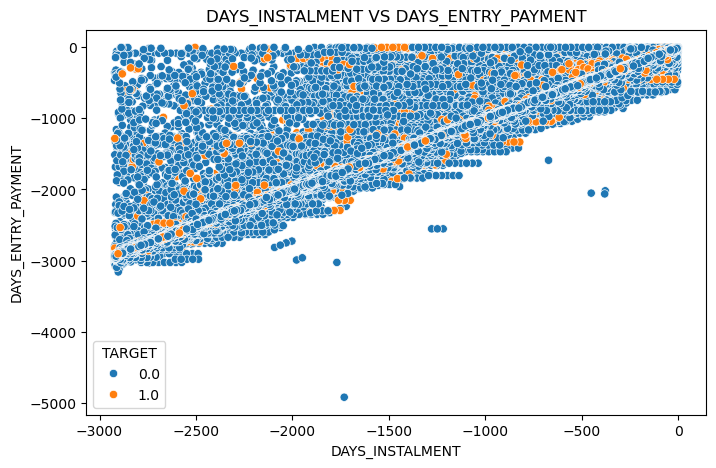

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", hue="TARGET", data=ip_target)
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT")
plt.show()

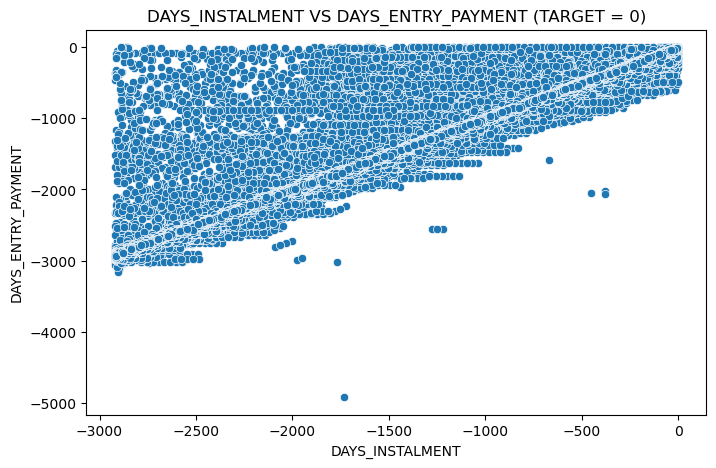

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", data=ip_target[ip_target["TARGET"]==0])
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT (TARGET = 0)")
plt.show()

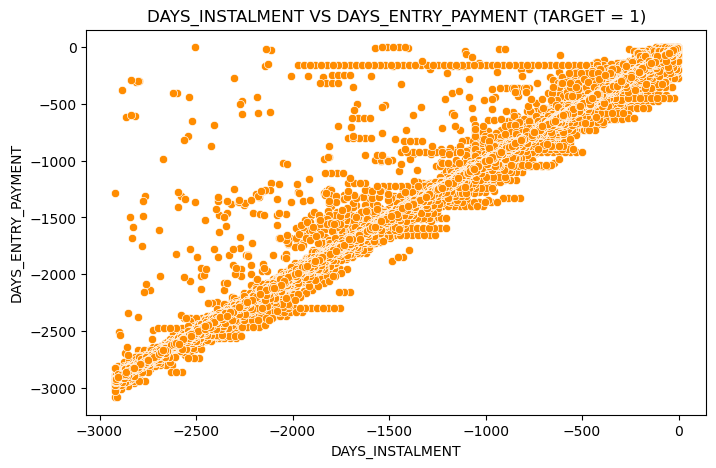

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", data=ip_target[ip_target["TARGET"]==1], color="darkorange")
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT (TARGET = 1)")
plt.show()

## No.4 Business Insight

- Persentase perbedaan median dari `AMT_INSTALMENT` dan `AMT_ENTRY_PAYMENT` pada target 0 lebih kecil dibandingkan target 1. Hal ini menunjukkan target 1 lebih kesusahan untuk membayar nilai installment yang sudah ditentukan dibandingkan target 0.
- Fitur `DAYS_INSTALMENT` dan `DAYS_ENTRY_PAYMENT` pada target 0 juga mempunyai perbedaan persentase median yang lebih kecil dibandingkan target 1. Hal ini menunjukkan bahwa target 1 cenderung membayar sedikit lebih telat dibandingkan target 0.
- Perbandingan dari `AMT_INSTALMENT` dengan `AMT_PAYMENT` tidak menunjukkan adanya perbedaan pola yang signifikan antara target 0 dengan 1.
- Perbandingan `DAYS_INSTALMENT` dengan `DAYS_ENTRY_PAYMENT` menunjukkan perbedaan pola. Target 1 menunjukkan pola korelasi yang lebih linear dan beraturan dibanding dengan target 0. Pola target 1 menunjukkan bahwa pengguna cenderung membayar tepat pada waktu yang ditentukan, sedangkan pola dari target 0 menunjukkan bahwa pengguna cenderung membayar sebelum batas waktu yang ditentukan.

# Data Cleansing

In [10]:
ip_target_clean = ip_target.copy()

In [20]:
ip_target_clean.duplicated().sum()

0

In [14]:
ip_target_clean.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2583
AMT_INSTALMENT               0
AMT_PAYMENT               2583
TARGET                       0
dtype: int64

## Handling Missing Values

In [16]:
ip_target_clean["DAYS_ENTRY_PAYMENT"] = ip_target_clean["DAYS_ENTRY_PAYMENT"].fillna(ip_target_clean["DAYS_ENTRY_PAYMENT"].median())
ip_target_clean["AMT_PAYMENT"] = ip_target_clean["AMT_PAYMENT"].fillna(ip_target_clean["AMT_PAYMENT"].median())

In [18]:
ip_target_clean.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
TARGET                    0
dtype: int64

## Handling Outlier

In [20]:
def outlierHandling(data, columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        high_limit = Q3 + (1.5*IQR)
        low_limit = Q1 - (1.5*IQR)
    
        data = data[((data[i] >= low_limit) & (data[i] <= high_limit))]

    return data

In [22]:
numeric = ip_target_clean.columns.tolist()
categorical = ["NUM_INSTALMENT_VERSION", "NUM_INSTALMENT_NUMBER", "TARGET"]
for i in range(len(categorical)):
    numeric.remove(categorical[i])
numeric

['SK_ID_PREV',
 'SK_ID_CURR',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

In [24]:
ip_target_clean = outlierHandling(ip_target_clean, numeric)

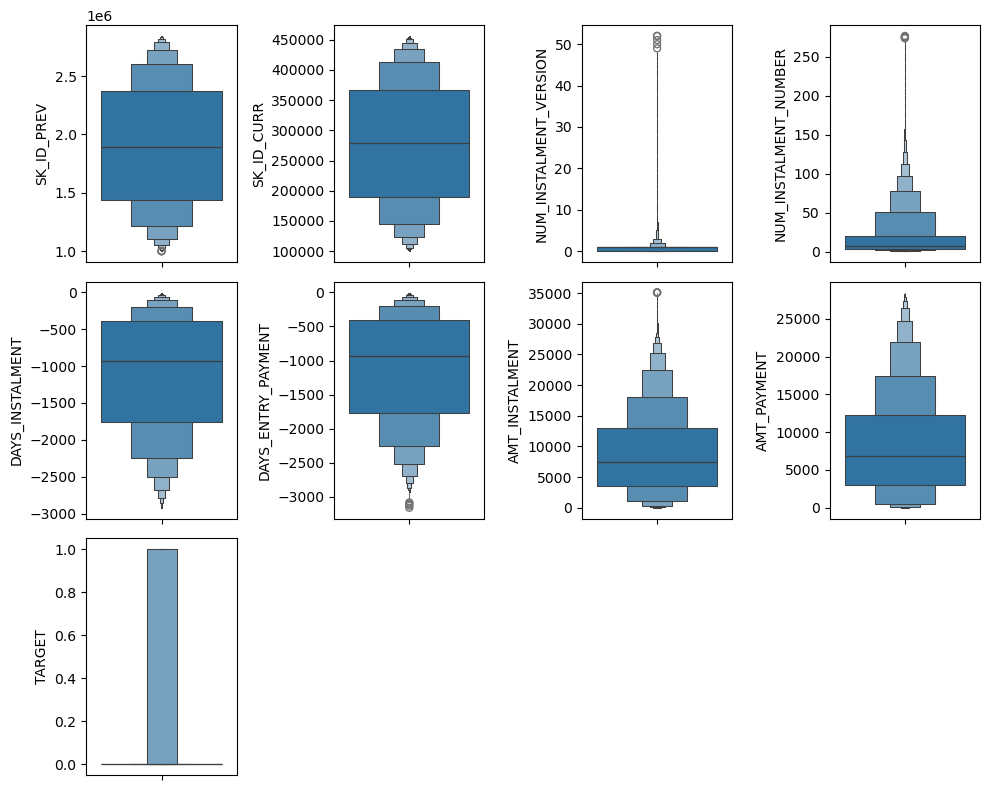

In [289]:
ip_target_clean_columns = ip_target_clean.columns.tolist()
plt.figure(figsize=(10,8))
for i in range(len(ip_target_clean_columns)):
    plt.subplot(3, 4, i+1)
    sns.boxenplot(y=ip_target_clean[ip_target_clean_columns[i]])
    plt.tight_layout()

MemoryError: Unable to allocate 78.2 MiB for an array with shape (10246361,) and data type int64

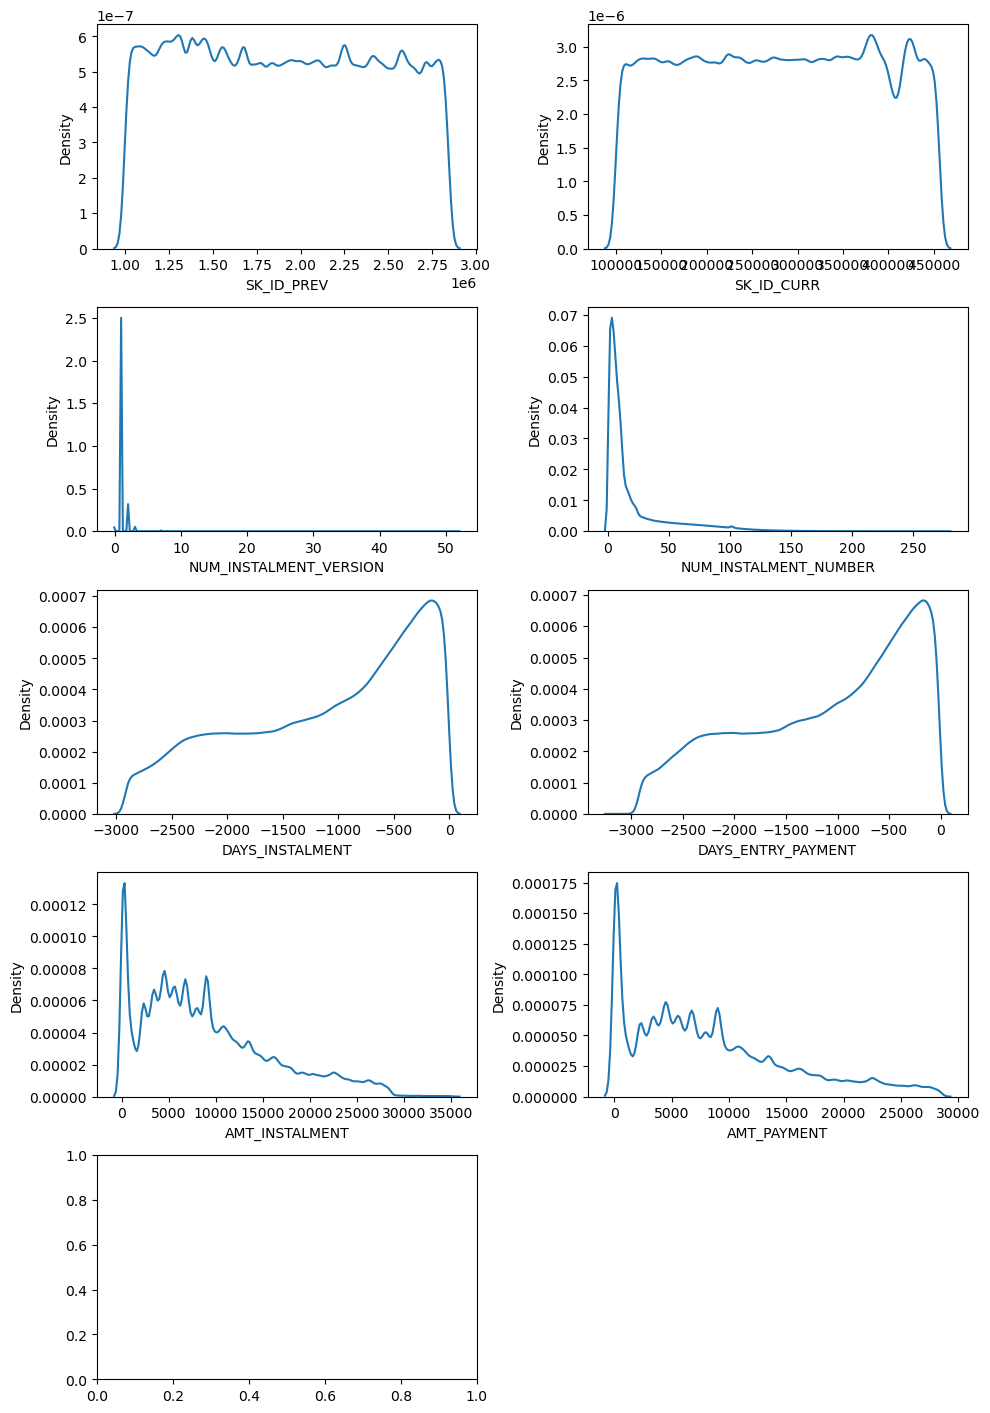

In [297]:
ip_target_clean_columns = ip_target_clean.columns.tolist()
plt.figure(figsize=(10,14))
for i in range(len(ip_target_clean_columns)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=ip_target_clean[ip_target_clean_columns[i]])
    plt.tight_layout()


## Summary Data Cleansing

- Secara keseluruhan tidak ada data duplikat.
- Ada 2583 missing values pada kolom `DAYS_ENTRY_PAYMENT` dan `AMT_PAYMENT` sehingga diisi dengan median dari masing-masing fitur.
- Dilakukan handling outlier pada data numerik seperti fitur `DAYS_INSTALMENT`, `DAYS_ENTRY_PAYMENT`, `AMT_INSTALMENT`, dan `AMT_PAYMENT`.

# Feature Engineering

In [26]:
#Rasio tanggal Installment dengan tanggal bayar
ip_target_clean["DAYS_ENTRY_PAYMENT_RATIO"] = ip_target_clean["DAYS_ENTRY_PAYMENT"]/ip_target_clean["DAYS_INSTALMENT"]

#Selisih jumlah Installment dengan jumlah yang dibayar
ip_target_clean["AMT_PAYMENT_DIFFERENCES"] = ip_target_clean["AMT_PAYMENT"]-ip_target_clean["AMT_INSTALMENT"]

#Versi installment credit card atau bukan (1=Yes, 0=No)
ip_target_clean["is_credit_card"] = np.where(ip_target_clean["NUM_INSTALMENT_VERSION"] == 0, 1, 0)

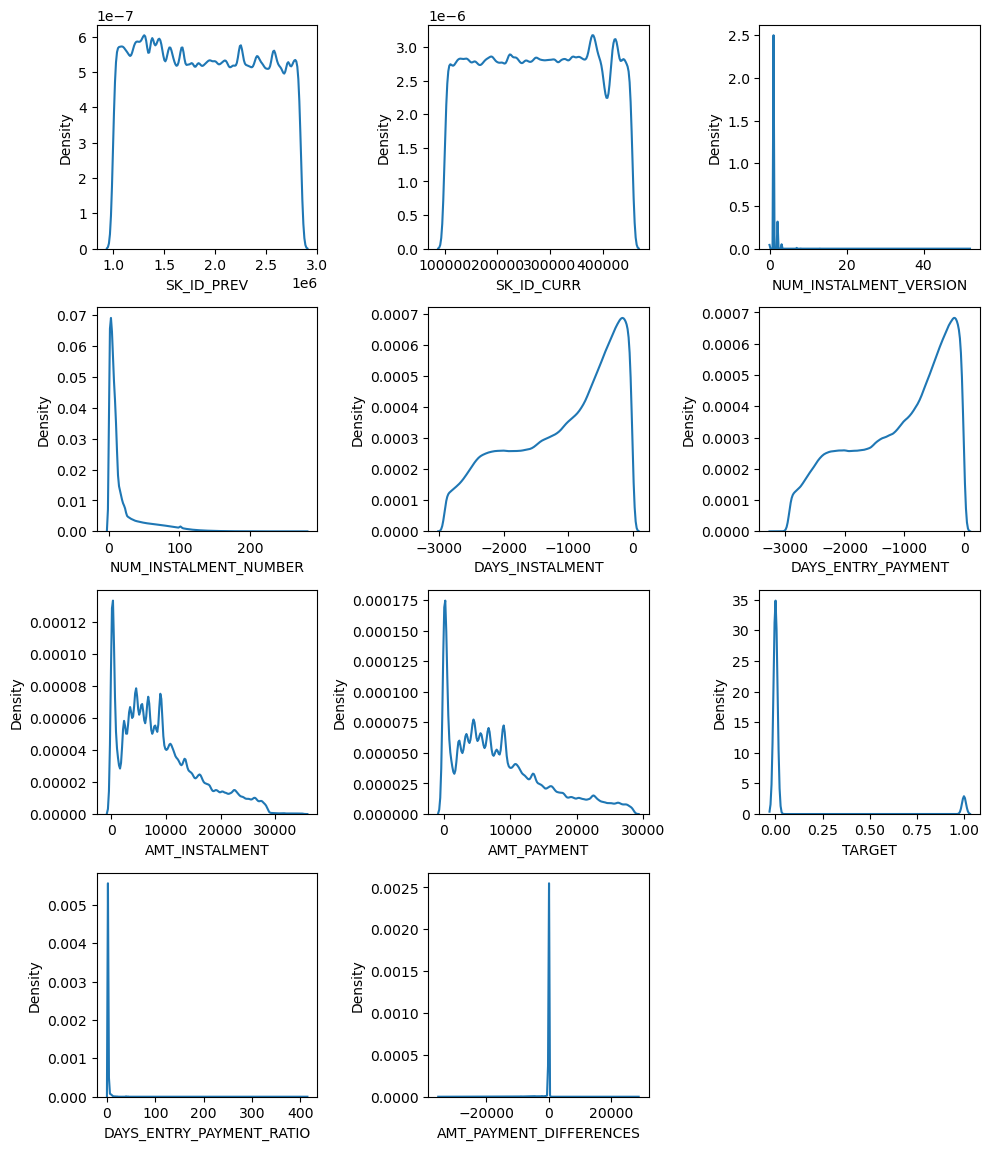

In [313]:
kolom = ip_target_clean.columns.tolist()

plt.figure(figsize=(10,14))
for i in range(len(kolom)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=ip_target_clean[kolom[i]])
    plt.tight_layout()

## Transformasi

In [34]:
column_log_transform = ["AMT_INSTALMENT", "AMT_PAYMENT", "DAYS_ENTRY_PAYMENT_RATIO"]

In [30]:
for i in range(len(column_log_transform)):
    ip_target_clean[column_log_transform[i]] = np.log(ip_target_clean[column_log_transform[i]], out=np.zeros_like(ip_target_clean[column_log_transform[i]], dtype=np.float64), where=(ip_target_clean[column_log_transform[i]] != 0))

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
from sklearn.preprocessing import StandardScaler

In [45]:
column_standarization = ["DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT", "AMT_PAYMENT_DIFFERENCES"]

ss = StandardScaler()

for i in column_standarization:
    scaler = ss.fit(ip_target_clean[[i]])
    ip_target_clean[[i]] = scaler.transform(ip_target_clean[[i]])

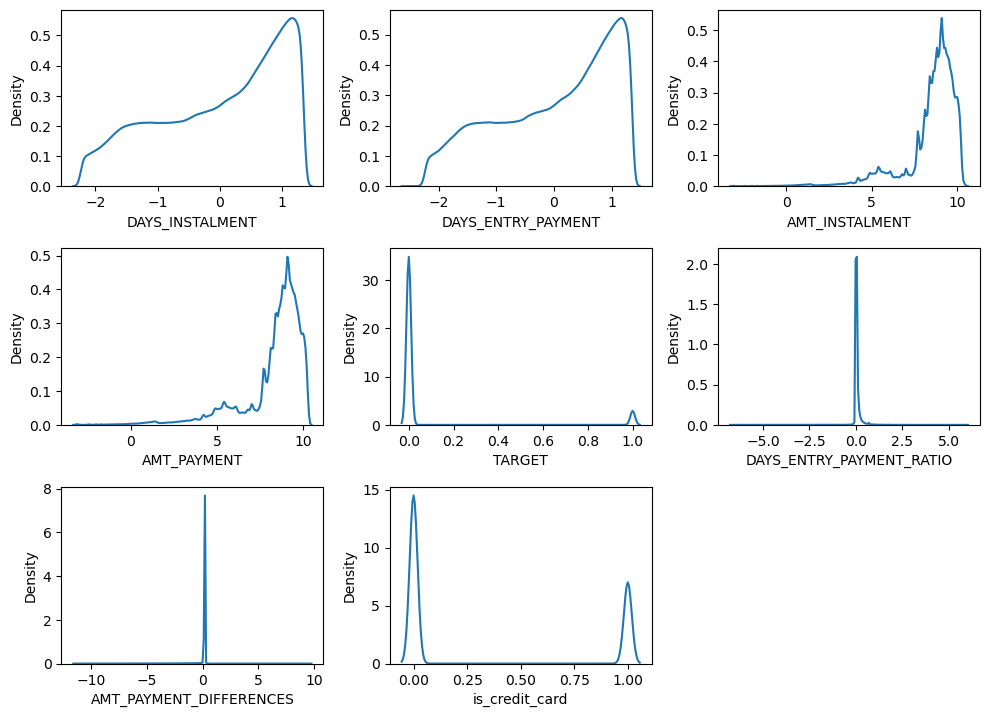

In [51]:
kolom = ip_target_clean.columns.tolist()

plt.figure(figsize=(10,14))
for i in range(len(kolom)-4):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=ip_target_clean[kolom[i+4]])
    plt.tight_layout()

## Handle Class Imbalance

In [58]:
from imblearn import over_sampling

In [74]:
ip_target_clean["TARGET"].value_counts()

TARGET
0    9457069
1     789292
Name: count, dtype: int64

In [60]:
x = ip_target_clean.drop(columns="TARGET")
y = ip_target_clean[["TARGET"]]

In [66]:
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(x, y)

In [72]:
y_over_SMOTE.value_counts()

TARGET
0         9457069
1         9457069
Name: count, dtype: int64


## Summary Feature Engineering

- Belum dilakukan drop feature, karena semua feature masih dianggap penting
- Membuat feature baru seperti:
  - `DAYS_ENTRY_PAYMENT_RATIO`: Rasio tanggal Installment dengan tanggal bayar
  - `AMT_PAYMENT_DIFFERENCES`: Selisih jumlah Installment dengan jumlah yang dibayar
  - `is_credit_card`: Versi installment credit card atau bukan (1=Yes, 0=No)
- Mentransformasi fitur menggunakan Log Transformation dan StandardScaler:
  - Log Transformasi :
    - `AMT_INSTALMENT`
    - `AMT_PAYMENT`
    - `DAYS_ENTRY_PAYMENT_RATIO`
  - StandardScaler:
    - `DAYS_INSTALMENT`
    - `DAYS_ENTRY_PAYMENT`
    - `AMT_PAYMENT_DIFFERENCES`
- Menghandle Class Imbalance menggunakan metode SMOTE agar target 1 seimbang dengan target 0.
- Ide fitur baru:
  - Tanggal ditetapkannya installment
  - Tanggal dibayarnya installment
  - Gender
  - Jenis Pekerjaan

In [129]:
# installments_payments_preprocessed = pd.concat([x_over_SMOTE, y_over_SMOTE], axis=1)

In [136]:
ip_target_clean.to_csv("installments_payments_preprocessed.csv")

In [144]:
ccb = pd.read_csv("credit_card_balance.csv")
ccb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [158]:
featureInfo(ccb)

Banyak data duplikat: 0


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_PREV,int64,0,0.000000,3840312,104307,"[2562384, 2582071, 1740877, 1389973]"
1,SK_ID_CURR,int64,0,0.000000,3840312,103558,"[378907, 363914, 371185, 337855]"
2,MONTHS_BALANCE,int64,0,0.000000,3840312,96,"[-6, -1, -7, -4]"
3,AMT_BALANCE,float64,0,0.000000,3840312,1347904,"[56.97, 63975.555, 31815.225, 236572.11]"
4,AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.000000,3840312,181,"[135000, 45000, 450000, 225000]"
5,AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.524872,3090496,2267,"[0.0, 2250.0, 67500.0, 45000.0]"
6,AMT_DRAWINGS_CURRENT,float64,0,0.000000,3840312,187005,"[877.5, 2250.0, 0.0, 11547.0]"
7,AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.524872,3090496,1832,"[0.0, 137700.0, nan, 177840.0]"
8,AMT_DRAWINGS_POS_CURRENT,float64,749816,19.524872,3090496,168748,"[877.5, 0.0, 11547.0, 199339.425]"
9,AMT_INST_MIN_REGULARITY,float64,305236,7.948208,3535076,312266,"[1700.325, 2250.0, 11795.76, 22924.89]"
